<center><h1>KALMAN FILTER EXAMPLE</h1></center>

## LOAD LIBRARIES

In [2]:
import plotly.io as pio
# pio.renderers.default = 'notebook'
from NotebookFunctions.kf_example_functions import *

## PROFILE 1:
This scenario consist of a single object moving in a straight line with a constant velocity and 1 sensor producing noisy measurements every 10 seconds indicating where in space the object is. First, consider the sensor's measurements are being fed into a Kalman Filter using a constant velocity model:

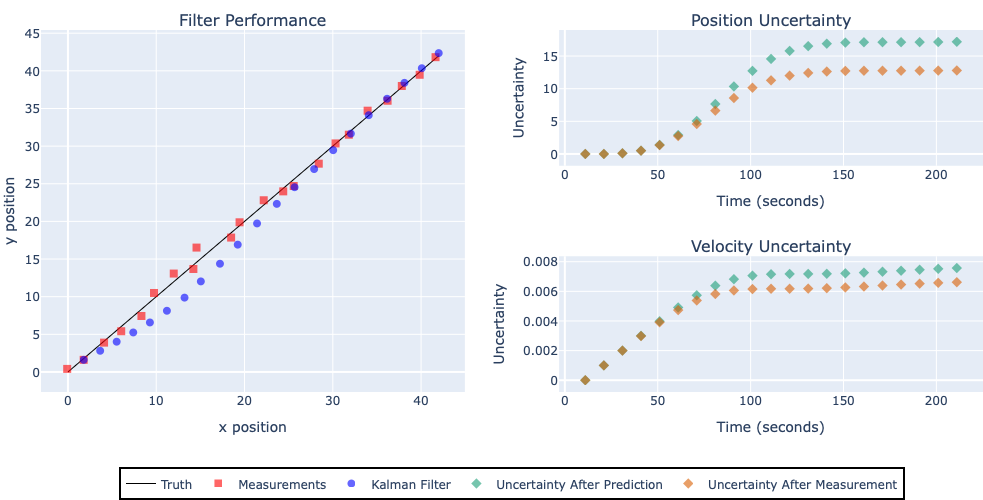

In [14]:
fig = straight_level_const_vel(meas_noise=50,process_noise=0.001,leg_pos=-0.3,height=500,width=750)
fig.show()

The Kalman filter is initiated on the second measurement since it takes two measurements to calculate an approximate velocity. The first prediction of the Kalman filter produces an extremely large uncertainty value pertaining to the estimated position of the object. However, due to the consistent income of measurements, the models uncertainty quickly approaches a confident state. Next, observe what happens when there is 5 consecutive missed measurements.

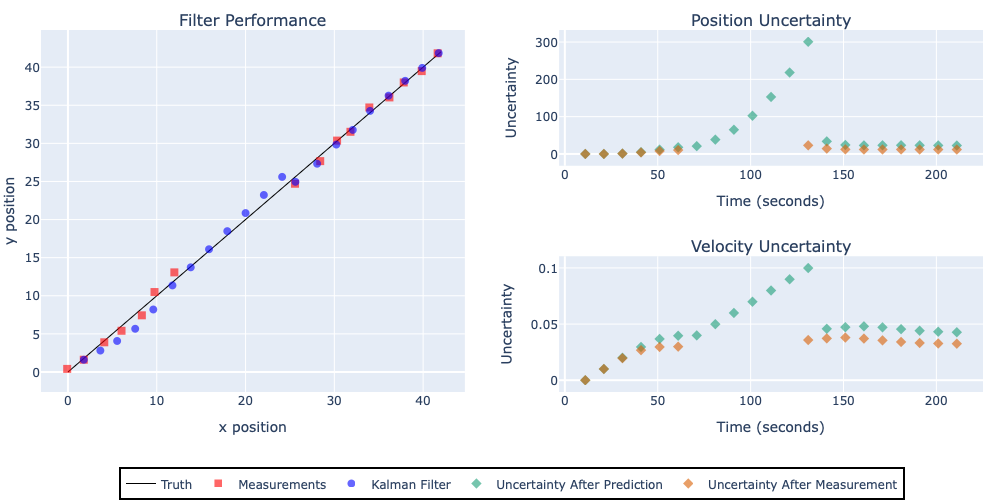

In [8]:
fig = straight_level_const_vel_missed_meas(meas_noise=25,process_noise=0.01,leg_pos=-0.3,height=500,width=750)
fig.show()

As expected, the uncertainty of the predicted state increases until the next measurement is available for use. Now, a constant acceleration model will be used to track the same object using the same measurement and process noises.

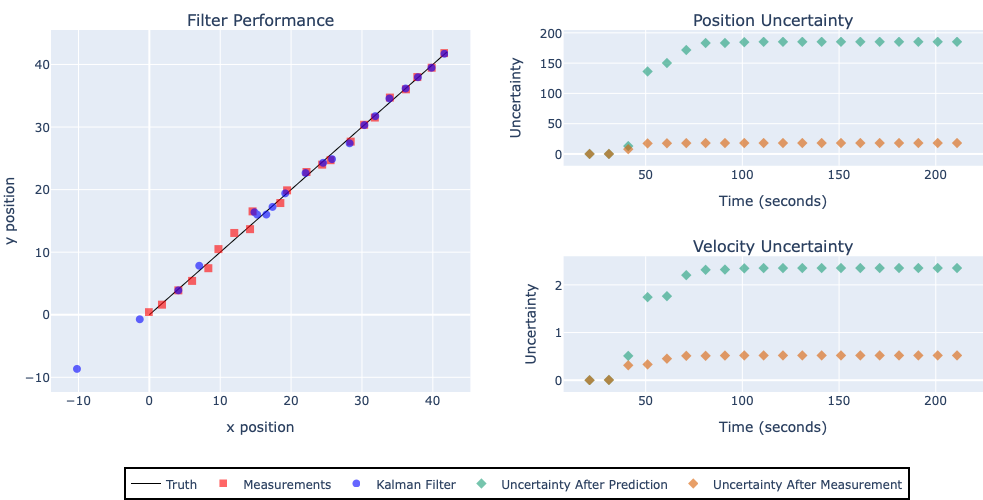

In [17]:
fig = straight_level_const_acc(meas_noise=20,process_noise=0.005,leg_pos=-0.3,height=500,width=750)
fig.show()

Since acceleration is now being considered in the model, atleast 3 measurements are required to start tracking the object since three measurements are needed to calculate acceleration. The model incorrectly assumes the velocity of the object is changing resulting in an increase in the uncertainties compared to when the correct model was utilized. This resulted in the measurements being weighted more in determining the predicted state.  

## PROFILE 2

Next, the object of interest will perform a maneuver. The overall profile will consist of 1 segment where the object is moving at a constant speed in a straight line (same as previous section) but after 120 seconds the object will perform a coordinated right turn for 180 seconds. First, the appropriate model (constant acceleration) will be used to track the object.

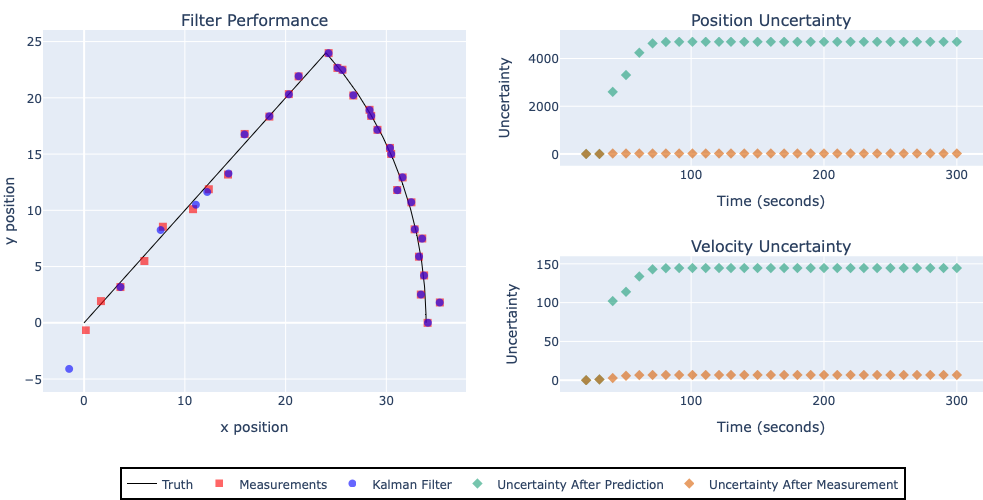

In [35]:
fig = maneuver_const_acc(meas_noise=20,process_noise=1,leg_pos=-0.3,height=500,width=750)
fig.show()

Now, an incorrect model (constant velocity) will be utilized.

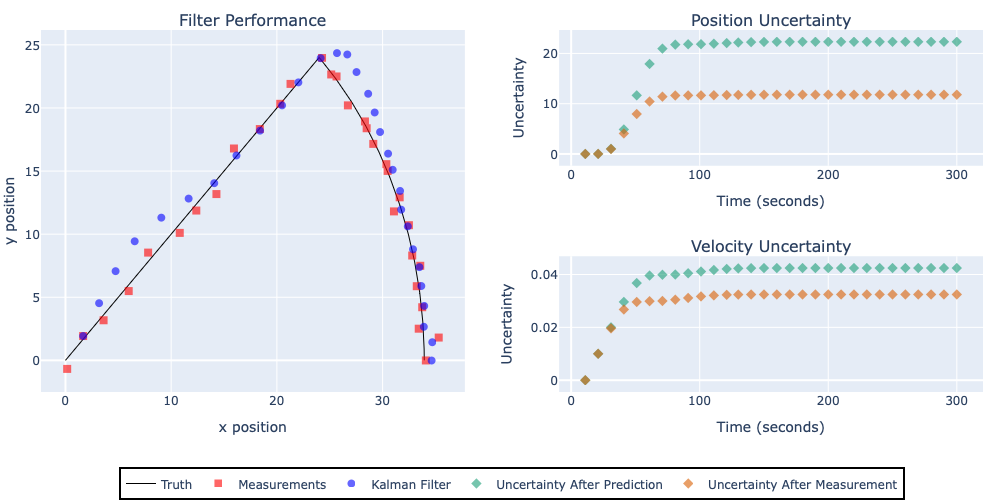

In [21]:
fig = maneuver_const_vel(meas_noise=25,process_noise=0.01,leg_pos=-0.3,height=500,width=750)
fig.show()